In [459]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [463]:
#Read data set
car_data=pd.read_csv('car_age_price.csv')
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


Step-1: Finding null values

In [465]:
car_data['Year'].isna().sum()

0

In [467]:
car_data['Price'].isna().sum()

0

In [469]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [471]:
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [473]:
car_data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [475]:
car_data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [477]:
car_data['Year'].value_counts()

Year
2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: count, dtype: int64

In [479]:
car_data['Price'].value_counts()

Price
550000    20
520000    11
500000    10
450000     6
490000     5
400000     5
600000     4
465000     4
300000     4
425000     3
350000     3
390000     3
525000     3
325000     3
375000     2
475000     2
575000     2
345000     2
320000     2
700000     2
540000     2
640000     1
480000     1
409999     1
396000     1
495000     1
595000     1
341000     1
755000     1
545000     1
486000     1
650000     1
434999     1
509999     1
420000     1
Name: count, dtype: int64

No missing values, null values, special symbols like ?,&, etc are found

Step-2: Finding outliers

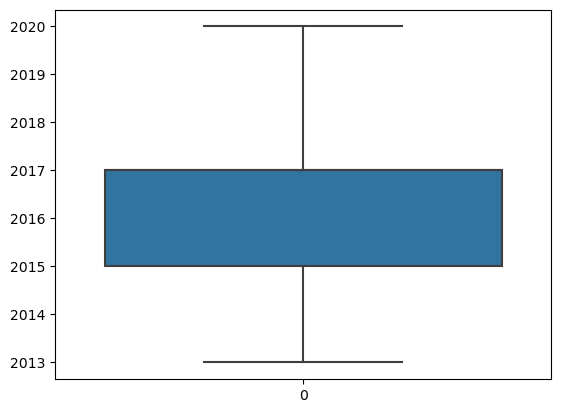

In [483]:
sns.boxplot(car_data['Year']);

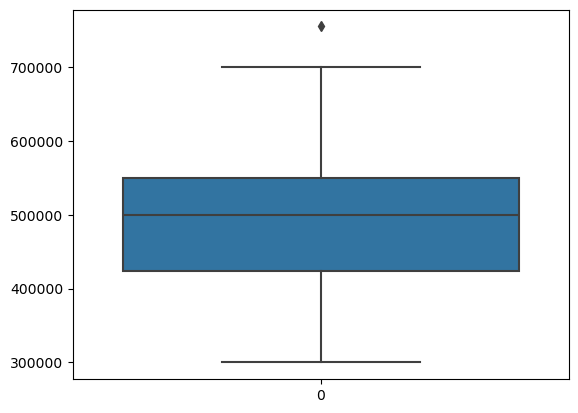

In [485]:
sns.boxplot(car_data['Price']);


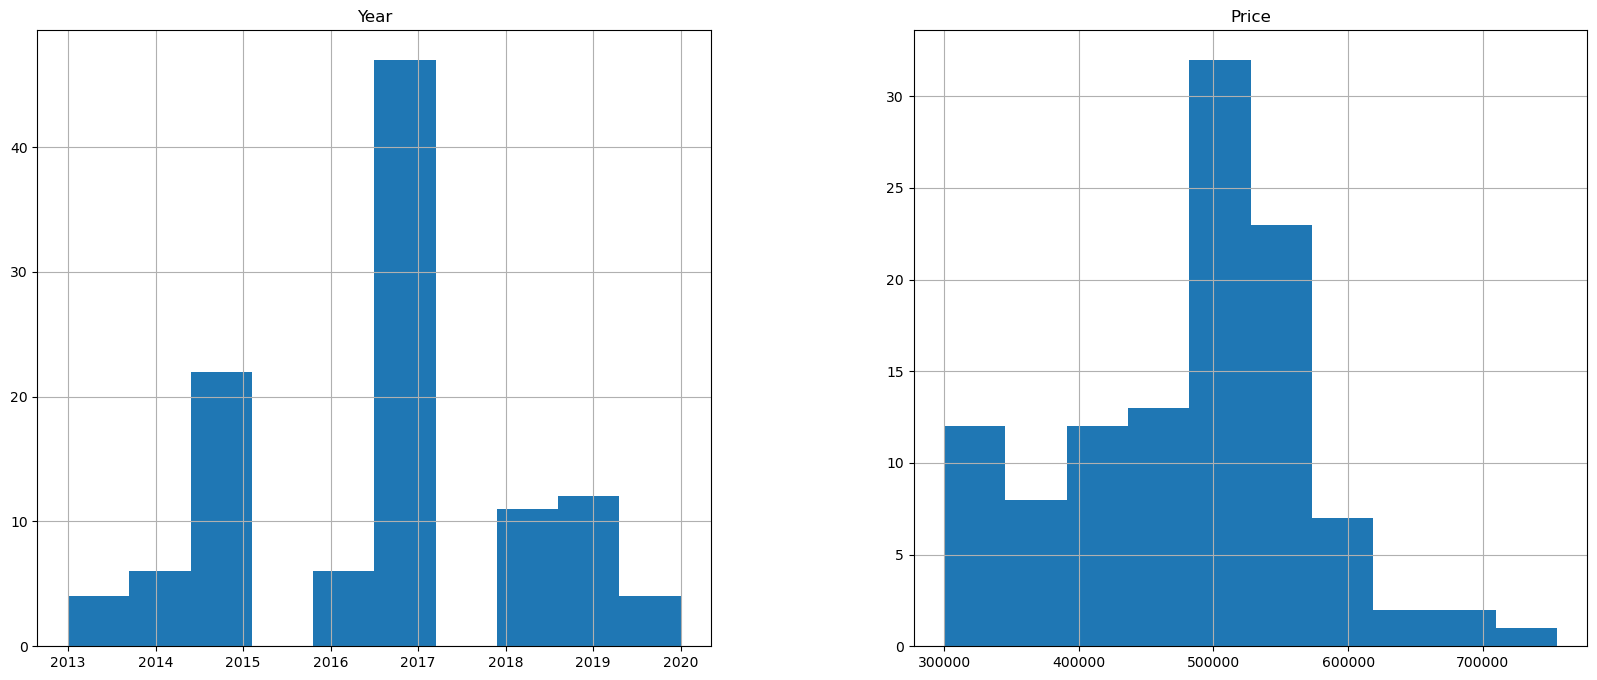

In [487]:
car_data.hist(figsize=(20,8))
plt.show();

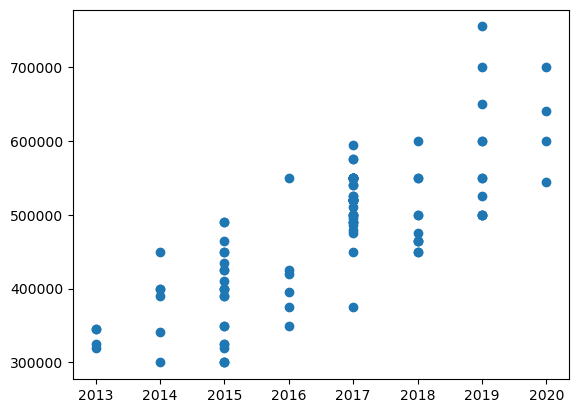

In [489]:
plt.scatter(car_data['Year'],car_data['Price'])

Since one outlier is found, it is clipped to highest whisker (Q3+1.5*IQR)

In [491]:
outlier_checking=['Price']
Q1=car_data[outlier_checking].quantile(0.25)
Q3=car_data[outlier_checking].quantile(0.75)

IQR=Q3-Q1
outliers_lower=car_data[outlier_checking]<(Q1-1.5*IQR)
outliers_upper=car_data[outlier_checking]>(Q3+1.5*IQR)

car_data[outlier_checking] = car_data[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)
car_data

,Year,Price
0,2018,465000
1,2019,739375
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


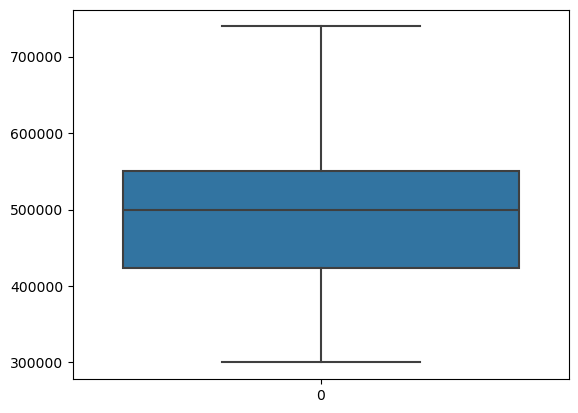

In [493]:
sns.boxplot(car_data['Price']);

Step-3: Finding and Removing duplicate rows

In [495]:
car_data[car_data.duplicated()]

,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [497]:
car_data.drop_duplicates(subset=None, keep='first',inplace=True,ignore_index=True)
car_data

,Year,Price
0,2018,465000
1,2019,739375
2,2019,700000
3,2015,350000
4,2016,425000
5,2017,575000
6,2017,509999
7,2019,500000
8,2018,500000
9,2017,500000


Since only numerical columns are there, no need for encoding.
Also, since only one feature or predictor column (year) is present, no need for scaling. Target variable is not scaled

Step-4: Finding correlation btw year and price

In [505]:
corr_data=car_data.corr()
corr_data

,Year,Price
Year,1.000000,0.809377
Price,0.809377,1.000000


In [507]:
X=car_data.drop('Price',axis=1)
y=car_data['Price']

In [509]:
X

,Year
0,2018
1,2019
2,2019
3,2015
4,2016
5,2017
6,2017
7,2019
8,2018
9,2017


In [511]:
y

0     465000
1     739375
2     700000
3     350000
4     425000
5     575000
6     509999
7     500000
8     500000
9     500000
10    600000
11    475000
12    550000
13    434999
14    650000
15    450000
16    486000
17    475000
18    545000
19    525000
20    550000
21    550000
22    450000
23    396000
24    600000
25    325000
26    345000
27    525000
28    341000
29    450000
30    550000
31    490000
32    540000
33    595000
34    495000
35    400000
36    465000
37    300000
38    450000
39    490000
40    320000
41    325000
42    409999
43    390000
44    390000
45    480000
46    320000
47    520000
48    640000
49    700000
50    600000
51    350000
52    375000
53    400000
54    375000
55    300000
56    425000
57    420000
Name: Price, dtype: int64

Step-5: Finding linear regression coefficients : m is slope of best fit line, y_int is y intercept

In [540]:
lr=LinearRegression()
lr.fit(X,y)
m=lr.coef_
y_int=lr.intercept_
print('slope of best fit line is', m, 'and y intercept of best fit line is',y_int)

slope of best fit line is [44801.85870747] and y intercept of best fit line is -89871859.03937797


Step-6: Best linear relationship between year and the carprice is plotted in a graph
e

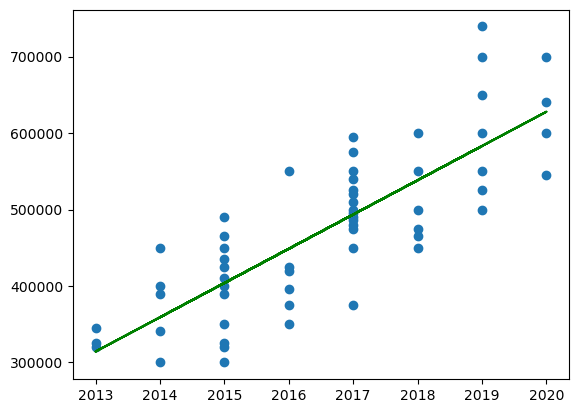

In [542]:
m=lr.coef_
c=lr.intercept_
y_new=(m*X)+c

plt.scatter(car_data['Year'],car_data['Price'])
plt.plot(X,y_new,color='Green')

Step-7: Splitting the data to test and train

In [544]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.8)

In [546]:
X_train

,Year
36,2015
31,2015
8,2018
17,2018
6,2017
4,2016
41,2015
19,2019
30,2016
49,2020


In [531]:
y_train

36    465000
31    490000
8     500000
17    475000
6     509999
4     425000
41    325000
19    525000
30    550000
49    700000
50    600000
54    375000
15    450000
9     500000
27    525000
26    345000
16    486000
24    600000
33    595000
55    300000
40    320000
11    475000
32    540000
56    425000
43    390000
29    450000
53    400000
1     739375
21    550000
2     700000
45    480000
39    490000
35    400000
23    396000
47    520000
10    600000
22    450000
18    545000
57    420000
20    550000
7     500000
42    409999
14    650000
28    341000
51    350000
38    450000
Name: Price, dtype: int64

In [533]:
X_test

,Year
0,2018
5,2017
34,2017
13,2015
44,2014
52,2017
37,2015
25,2013
46,2015
12,2017


In [535]:
y_test

0     465000
5     575000
34    495000
13    434999
44    390000
52    375000
37    300000
25    325000
46    320000
12    550000
48    640000
3     350000
Name: Price, dtype: int64

Step-8: Prediction of car price at 2022 using Liner Regression model

In [548]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([541345.73387098, 497686.88790324, 497686.88790324, 410369.19596775,
       366710.35000001, 497686.88790324, 410369.19596775, 323051.50403227,
       410369.19596775, 497686.88790324, 628663.42580646, 410369.19596775])

In [550]:

print('MSE value in Linear Regression model is:',mean_squared_error(y_test,y_pred))

MSE value in Linear Regression model is: 4572973527.050687


In [552]:
r_value=r2_score(y_test,y_pred)
print('r2_value in Linear Regression model is:',r_value)

r2_value in Linear Regression model is: 0.5957592462302933


In [554]:
pred_1=[[2022]]
check=model.predict(pred_1)
print('car price at 2022 using Linear Regression model is:',check)

car price at 2022 using Linear Regression model is: [715981.11774194]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Step-9: Prediction of car price at 2022 using Lasso model

In [556]:

lo=Lasso()
model_lo=lo.fit(X_train,y_train)
y_pred_lo=lo.predict(X_test)
y_pred_lo

array([541345.36290324, 497686.8013441 , 497686.8013441 , 410369.67822582,
       366711.11666667, 497686.8013441 , 410369.67822582, 323052.55510753,
       410369.67822582, 497686.8013441 , 628662.48602152, 410369.67822582])

In [558]:
print('MSE value in Lasso model is:',mean_squared_error(y_test,y_pred_lo))

MSE value in Lasso model is: 4572986334.045131


In [560]:
r_value=r2_score(y_test,y_pred_lo)
print('r2 value in Lasso model is:',r_value)

r2 value in Lasso model is: 0.5957581141202872


In [564]:
pred_lo=[[2022]]
check=model_lo.predict(pred_lo)
print('car price at 2022 using Lasso model is:',check)

car price at 2022 using Lasso model is: [715979.6091398]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Thus it is found that car price at 2022 using Linear Regression and Lasso models does not vary much. MSE and r2 value also found to be same in both models